In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

## 1-4: Wrangle dem data!

In [28]:
df_cross = pd.read_csv('aau1043_dnm.tsv')
df_age = pd.read_csv('aau1043_parental_age.tsv')

In [23]:
df_new = df_cross.drop(["Chr", "Pos", "Ref", "Alt", "Sanger"], axis = 1)
df_pro = pd.DataFrame(df_new.value_counts('Proband_id'))
df_pro.rename(columns={"0" : "Count"})
df_pro

#df_pro.rename_axis().res_index(name=)
df_cross.groupby('Proband_id')['Phase_combined'].value_counts()

Proband_id  Phase_combined
675         father            51
            mother            19
1097        father            26
            mother            12
1230        father            42
                              ..
154621      mother            11
154810      father            55
            mother            14
154936      father            36
            mother            16
Name: Phase_combined, Length: 792, dtype: int64

In [31]:
df_mother = pd.DataFrame(df_cross[df_cross['Phase_combined']=="mother"]["Proband_id"].value_counts().rename_axis(["Proband_id"]).reset_index(name = 'mat_dnm'))
df_father = pd.DataFrame(df_cross[df_cross['Phase_combined']=="father"]["Proband_id"].value_counts().rename_axis(["Proband_id"]).reset_index(name = 'pat_dnm'))
df_father.head()

,Proband_id,pat_dnm
0,91410,111
1,114094,98
2,111288,93
3,99984,91
4,64166,88


In [32]:
df_tot = pd.DataFrame(df_cross.Proband_id.value_counts().rename_axis(["Proband_id"]).reset_index(name = 'tot_dnm'))
df_tot

,Proband_id,tot_dnm
0,91410,122
1,114094,121
2,111288,115
3,8147,114
4,88246,113
...,...,...
391,121087,37
392,62630,34
393,76504,34
394,37789,34


In [ ]:
# merge data frames

In [34]:
df_intermediate = df_father.merge(df_mother, on="Proband_id")
df_intermediate

,Proband_id,pat_dnm,mat_dnm
0,91410,111,10
1,114094,98,22
2,111288,93,21
3,99984,91,12
4,64166,88,16
...,...,...,...
391,76504,27,5
392,1097,26,12
393,13990,25,7
394,36430,25,16


In [36]:
df_final = df_intermediate.merge(df_tot, on="Proband_id")
df_final

,Proband_id,pat_dnm,mat_dnm,tot_dnm
0,91410,111,10,122
1,114094,98,22,121
2,111288,93,21,115
3,99984,91,12,103
4,64166,88,16,105
...,...,...,...,...
391,76504,27,5,34
392,1097,26,12,39
393,13990,25,7,33
394,36430,25,16,42


In [37]:
df_reg = df_final.merge(df_age, on="Proband_id")
df_reg

,Proband_id,pat_dnm,mat_dnm,tot_dnm,Father_age,Mother_age
0,91410,111,10,122,51,34
1,114094,98,22,121,51,44
2,111288,93,21,115,53,44
3,99984,91,12,103,51,41
4,64166,88,16,105,41,40
...,...,...,...,...,...,...
391,76504,27,5,34,19,17
392,1097,26,12,39,19,19
393,13990,25,7,33,16,17
394,36430,25,16,42,35,26


## 5: Plot maternal mutations vs age and paternal mutations vs age

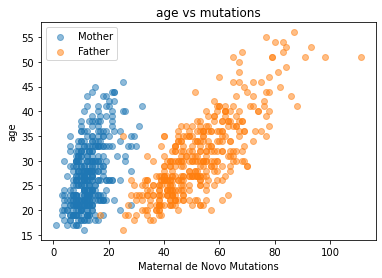

In [56]:
fig, ax = plt.subplots()
ax.scatter(df_reg['mat_dnm'], df_reg['Mother_age'], alpha = 0.5, label = 'Mother')
ax.scatter(df_reg['pat_dnm'], df_reg['Father_age'], alpha = 0.5, label = 'Father')
ax.set_title('age vs mutations')
ax.set_xlabel('Maternal de Novo Mutations')
ax.set_ylabel('age')
plt.legend()


## 6:evaluate using ordinary least squares to evaluate maternal age and inherited denovo mutations

In [47]:
model = smf.ols(formula = 'mat_dnm ~ 1 + Mother_age', data = df_reg)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mat_dnm   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        14:41:53   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 7: evaluate using ordinary least squares to evaluate paternal age and inherited denovo mutations

In [48]:
model1 = smf.ols(formula = 'pat_dnm ~ 1 + Father_age', data = df_reg)
results = model1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pat_dnm   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        14:41:53   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3263      1.702      6.066      0.000       6.979      13.673
Father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 8: plot a histogram

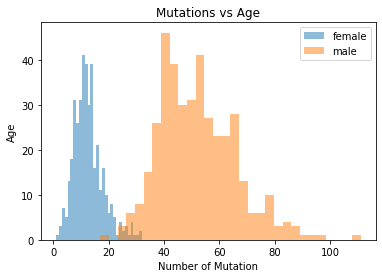

In [55]:
fig, ax = plt.subplots()
ax.hist(df_reg["mat_dnm"], label = "female", bins = 30, alpha = 0.5)
ax.hist(df_reg["pat_dnm"], label = "male", bins = 30, alpha = 0.5)
plt.title("Mutations vs Age")
plt.xlabel("Number of Mutation")
plt.ylabel("Age")
plt.legend()
plt.show()

## 9: Test whether maternal mutations are signifiantly different than paternal mutations


In [57]:
stats.ttest_ind(df_final["mat_dnm"], df_final["pat_dnm"])



Ttest_indResult(statistic=-53.403565287269245, pvalue=2.1986031793078793e-264)

In [ ]:
# yes, there is statistically signifant difference

## 10 Refit the model: Poisson regression

In [58]:
model = smf.poisson(formula = 'mat_dnm ~ 1 + Mother_age', data = df_reg)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 2.927974
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                 0.07164
Time:                        15:00:19   Log-Likelihood:                -1159.5
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 8.241e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7671      0.060     29.235      0.000       1.649       1.886
Mother_age     0.0281      0.002     13.582      0.000       0.024       0.032
==============================================================================
"""

In [59]:
model = smf.poisson(formula = 'pat_dnm ~ 1 + Father_age', data = df_reg)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                  0.2277
Time:                        15:00:52   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

## 11: prediction

In [6]:
import math

beta = 50.5
alpha = 3.1903
x = 0.0241
print("predicted # of denovo mutations")
math.exp(alpha + beta*x)

predicted # of denovo mutations


82.05173803957092

In [ ]:
# new_observation = pd.DataFrame({"Father_age": [50.5]})